In [1]:
import numpy as np
import pandas as pd
import torch
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/gscdit/Breast-Cancer-Detection/refs/heads/master/data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
df.shape

(569, 33)

In [4]:
df.drop(columns=['id', 'Unnamed: 32'], inplace= True)

In [5]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### train test split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, 1:], df.iloc[:, 0], test_size=0.2)

### scaling

In [7]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [8]:
X_train

array([[-0.1659717 , -1.93971695, -0.16403801, ..., -0.65779506,
        -0.31223032, -0.69521164],
       [-0.47026867, -1.49862739, -0.54015305, ..., -1.39833471,
        -1.00093227, -0.78657566],
       [ 2.00392164,  0.8841898 ,  1.87767015, ...,  1.32914473,
        -0.13284749, -0.50743896],
       ...,
       [ 0.26630063, -0.04233167,  0.22326106, ..., -0.0635774 ,
        -0.997729  , -0.8280538 ],
       [ 1.98401436,  1.70802375,  2.10549314, ...,  2.72969993,
         1.91083549,  2.4711402 ],
       [-0.52430271, -0.3107195 , -0.55755044, ..., -0.32488904,
         0.88098584, -0.8605637 ]])

In [9]:
y_train

,diagnosis
76,B
493,B
23,M
150,B
294,B
...,...
149,B
290,B
514,M
181,M


### Label Encoding

In [10]:
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)

In [11]:
y_train

array([0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,

### Numpy arrays to PyTorch tensors

In [12]:
X_train_tensor = torch.from_numpy(X_train.astype(np.float32))
X_test_tensor = torch.from_numpy(X_test.astype(np.float32))
y_train_tensor = torch.from_numpy(y_train.astype(np.float32))
y_test_tensor = torch.from_numpy(y_test.astype(np.float32))

In [13]:
X_train_tensor.shape

torch.Size([455, 30])

In [14]:
y_train_tensor.shape

torch.Size([455])

In [15]:
from torch.utils.data import Dataset, DataLoader

class CustomDataset(Dataset):

  def __init__(self, features, labels):

    self.features = features
    self.labels = labels

  def __len__(self):

    return len(self.features)

  def __getitem__(self, idx):

    return self.features[idx], self.labels[idx]



In [16]:
train_dataset = CustomDataset(X_train_tensor, y_train_tensor)
test_dataset = CustomDataset(X_test_tensor, y_test_tensor)

In [17]:
train_dataset[10]

(tensor([ 1.5034, -0.2500,  1.4634,  1.3944,  0.5318,  0.7587,  0.9729,  1.2208,
          0.3076, -0.5604,  0.2471, -0.3808,  0.0275,  0.2803, -0.4607, -0.2155,
         -0.0534,  0.5544, -0.5172, -0.7335,  1.5465,  0.4867,  1.3383,  1.3057,
          0.8580,  0.7363,  0.7653,  1.7098,  1.0972, -0.3611]),
 tensor(1.))

In [18]:
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=True)

### Defining the model

In [19]:
import torch.nn as nn


class MySimpleNN(nn.Module):

  def __init__(self, num_features):

    super().__init__()
    self.linear = nn.Linear(num_features, 1)
    self.sigmoid = nn.Sigmoid()

  def forward(self, features):

    out = self.linear(features)
    out = self.sigmoid(out)

    return out

### Important Parameters

In [20]:
learning_rate = 0.1
epochs = 25

In [21]:
# create model
model = MySimpleNN(X_train_tensor.shape[1])

# define optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# define loss function
loss_function = nn.BCELoss()

### Training Pipeline

In [22]:

# define loop
for epoch in range(epochs):

  for batch_features, batch_labels in train_loader:

    # forward pass
    y_pred = model(batch_features)

    # loss calculate
    loss = loss_function(y_pred, batch_labels.view(-1,1))

    # clear gradients
    optimizer.zero_grad()

    # backward pass
    loss.backward()

    # parameters update
    optimizer.step()

  # print loss in each epoch
  print(f'Epoch: {epoch + 1}, Loss: {loss.item()}')

Epoch: 1, Loss: 0.231049045920372
Epoch: 2, Loss: 0.16330276429653168
Epoch: 3, Loss: 0.080417700111866
Epoch: 4, Loss: 0.11062158644199371
Epoch: 5, Loss: 0.12301551550626755
Epoch: 6, Loss: 0.0416589193046093
Epoch: 7, Loss: 0.6527318358421326
Epoch: 8, Loss: 0.0724705308675766
Epoch: 9, Loss: 0.03499095141887665
Epoch: 10, Loss: 0.049829743802547455
Epoch: 11, Loss: 0.12529256939888
Epoch: 12, Loss: 0.14744344353675842
Epoch: 13, Loss: 0.067632295191288
Epoch: 14, Loss: 0.14680492877960205
Epoch: 15, Loss: 0.014272698201239109
Epoch: 16, Loss: 0.0651586651802063
Epoch: 17, Loss: 0.004584309179335833
Epoch: 18, Loss: 0.09438340365886688
Epoch: 19, Loss: 0.019451817497611046
Epoch: 20, Loss: 0.21207642555236816
Epoch: 21, Loss: 0.07614976167678833
Epoch: 22, Loss: 0.13306550681591034
Epoch: 23, Loss: 0.009406176395714283
Epoch: 24, Loss: 0.028932612389326096
Epoch: 25, Loss: 0.07735444605350494


### Evaluation

In [23]:
# Model evaluation using test_loader
model.eval()  # Set the model to evaluation mode
accuracy_list = []

with torch.no_grad():
    for batch_features, batch_labels in test_loader:
        # Forward pass
        y_pred = model(batch_features)
        y_pred = (y_pred > 0.8).float()  # Convert probabilities to binary predictions

        # Calculate accuracy for the current batch
        batch_accuracy = (y_pred.view(-1) == batch_labels).float().mean().item()
        accuracy_list.append(batch_accuracy)

# Calculate overall accuracy
overall_accuracy = sum(accuracy_list) / len(accuracy_list)
print(f'Accuracy: {overall_accuracy:.4f}')


Accuracy: 0.9766


# A note about Parallelization

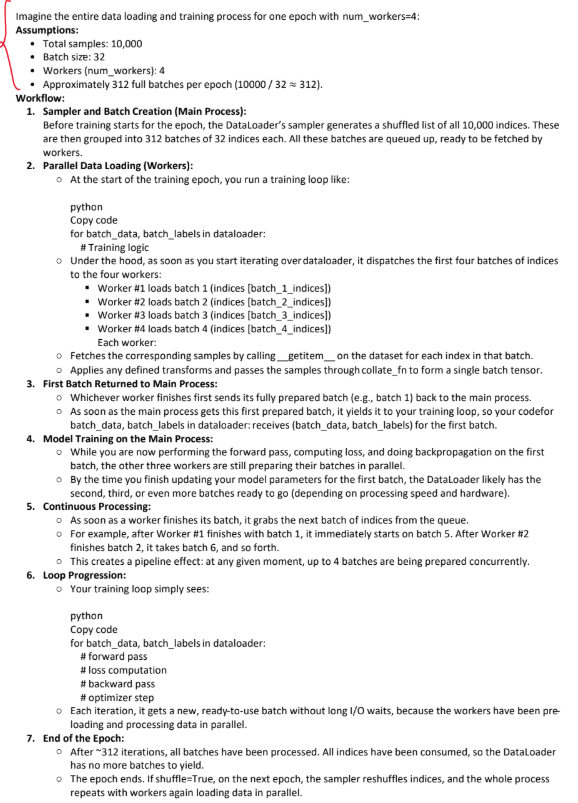

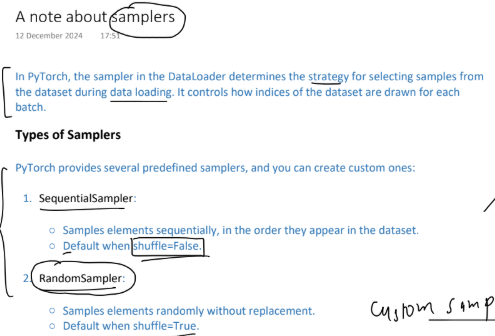

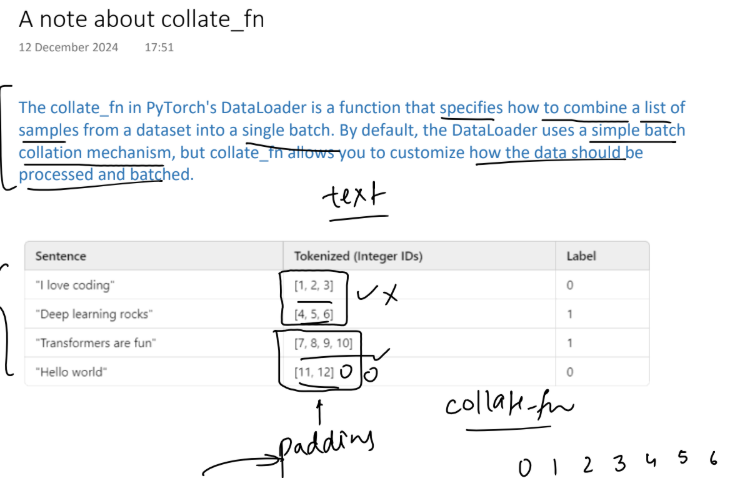

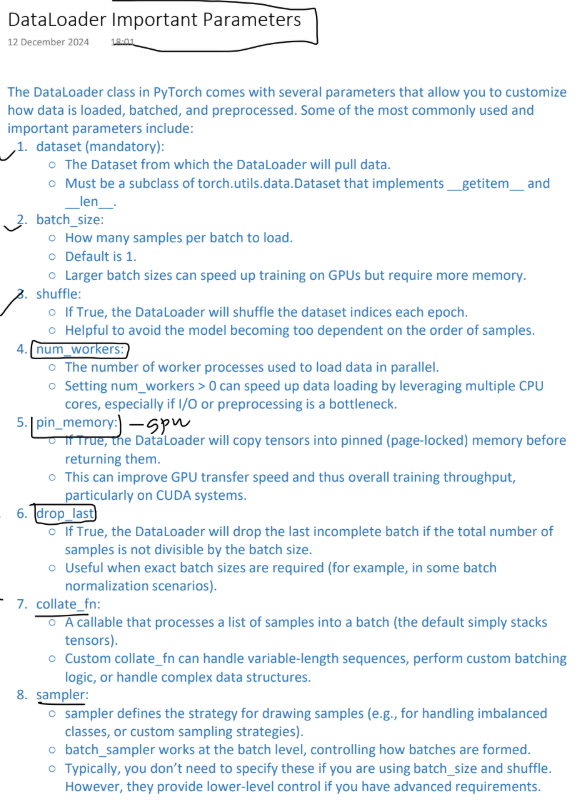